# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

### Path

In [2]:
DATA_PATH = './data/'
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

### Metadata

In [3]:
NB15_FEATURES = 'UNSW-NB15_features-modified.csv'

In [4]:
metadata = pd.read_csv(DATA_PATH + TRAIN_PATH + NB15_FEATURES)

metadata

,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,Indicates to the state and its dependent proto...,basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ...",basic


### Train

In [5]:
ADDITIONAL_FEATURES_TRAIN = 'additional_features_train.csv'
BASIC_FEATURES_TRAIN = 'basic_features_train.csv'
CONTENT_FEATURES_TRAIN = 'content_features_train.csv'
FLOW_FEATURES_TRAIN = 'flow_features_train.csv'
LABELS_TRAIN = 'labels_train.csv'
TIME_FEATURES_TRAIN = 'time_features_train.csv'

In [6]:
dataset_paths_train = [
    ADDITIONAL_FEATURES_TRAIN,
    BASIC_FEATURES_TRAIN,
    CONTENT_FEATURES_TRAIN,
    FLOW_FEATURES_TRAIN,
    LABELS_TRAIN,
    TIME_FEATURES_TRAIN
]

In [7]:
all_data_train = [pd.read_csv(DATA_PATH + TRAIN_PATH + dp) for dp in dataset_paths_train]

df_train = all_data_train[0]

for df_i in all_data_train[1:]:
    df_train = pd.merge(df_train, df_i, on='id')

df_train

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,attack_cat,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,tcp,Normal,0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,udp,Generic,1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,tcp,Exploits,1,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,tcp,Normal,0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,udp,Normal,0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,2.0,0.0,0.0,0.0,38.0,38.0,32.0,NaN,32.0,...,udp,Generic,1,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000
175337,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,NaN,...,tcp,Exploits,1,15464.286700,531.848125,193.445428,209.600766,0.066524,0.047738,0.018786
175338,0.0,2.0,0.0,NaN,0.0,33.0,33.0,16.0,16.0,16.0,...,udp,Generic,1,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
175339,0.0,2.0,0.0,0.0,0.0,36.0,36.0,NaN,37.0,36.0,...,udp,Generic,1,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,NaN


### Test

In [8]:
ADDITIONAL_FEATURES_TEST = 'additional_features_test.csv'
BASIC_FEATURES_TEST = 'basic_features_test.csv'
CONTENT_FEATURES_TEST = 'content_features_test.csv'
FLOW_FEATURES_TEST = 'flow_features_test.csv'
TIME_FEATURES_TEST = 'time_features_test.csv'

In [9]:
dataset_paths_test = [
    ADDITIONAL_FEATURES_TEST,
    BASIC_FEATURES_TEST,
    CONTENT_FEATURES_TEST,
    FLOW_FEATURES_TEST,
    TIME_FEATURES_TEST
]

In [10]:
all_data_test = [pd.read_csv(DATA_PATH + TEST_PATH + dp) for dp in dataset_paths_test]

df_test = all_data_test[0]

for df_i in all_data_test[1:]:
    df_test = pd.merge(df_test, df_i, on='id')

df_test

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,tcp,1902.551328,143.722203,16.088482,87.730055,0.117474,0.071119,0.046355
20579,0.0,0.0,0.0,0.0,0.0,14.0,7.0,1.0,9.0,1.0,...,0.0,0.0,tcp,858.139465,22.118752,14.832222,13.803000,0.000647,0.000491,0.000156
20580,0.0,2.0,0.0,0.0,0.0,6.0,6.0,NaN,4.0,4.0,...,0.0,0.0,udp,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
20581,0.0,2.0,0.0,0.0,0.0,11.0,11.0,4.0,8.0,4.0,...,0.0,0.0,unas,0.000000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [11]:
# df_train['is_ftp_login'] = df_train['is_ftp_login'].replace({0: 'false', 1:'true'})

# df_train['is_sm_ips_ports'] = df_train['is_sm_ips_ports'].replace({0: 'false', 1:'true'})

# df_train['service'] = df_train['service'].replace({'-' : 'unknown'})

In [12]:
data_size = df_train.shape
num_instances, num_features = data_size

data_size

(175341, 44)

In [13]:
df_train.head()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,attack_cat,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,tcp,Normal,0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,udp,Generic,1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,tcp,Exploits,1,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,tcp,Normal,0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,udp,Normal,0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              166536 non-null  object 
 14  dur                166619 non-null  float64
 15  sbytes             166780 non-null  float64
 16  db

In [15]:
df_train.isnull().sum()

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
label                   0
sjit                 8738
djit        

In [16]:
df_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,attack_cat,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
151405,0.0,2.0,0.0,0.0,0.0,NaN,18.0,18.0,19.0,18.0,...,udp,Generic,1,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000
140458,0.0,2.0,0.0,0.0,0.0,39.0,39.0,36.0,33.0,33.0,...,udp,Generic,1,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,0.000000
164086,0.0,0.0,0.0,NaN,0.0,1.0,1.0,5.0,1.0,1.0,...,udp,Normal,0,0.000000,0.000000,0.009000,0.006000,0.000000,0.000000,0.000000
33302,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,tcp,Exploits,1,867.538926,45.611391,8.097539,38.646746,0.027727,0.012251,0.015476
9523,0.0,1.0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,1.0,...,tcp,Fuzzers,1,5346.962989,275.527500,100.918889,163.388000,0.240487,0.118464,0.122023
32053,0.0,0.0,0.0,0.0,0.0,7.0,8.0,7.0,9.0,6.0,...,tcp,Normal,0,72.154965,1.975125,1.178067,1.030588,0.000609,0.000475,0.000134
73490,0.0,0.0,0.0,0.0,0.0,2.0,3.0,7.0,1.0,1.0,...,tcp,Normal,0,14.921796,12.589261,0.244143,0.210130,0.000755,0.000628,0.000127
128954,0.0,1.0,NaN,0.0,0.0,NaN,2.0,2.0,24.0,2.0,...,tcp,Normal,0,2384.212031,118.338039,44.483444,76.229203,0.163803,0.049010,0.114793
93484,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,unas,DoS,1,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.000000
43494,0.0,2.0,0.0,0.0,0.0,6.0,6.0,2.0,4.0,2.0,...,unas,DoS,1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN


In [17]:
df_train.dtypes.value_counts()

float64    38
object      4
int64       2
dtype: int64

In [18]:
numeric_feats = df_train.select_dtypes(include=np.number)

categorical_feats = df_train.select_dtypes(include='object')

In [19]:
numeric_feats.describe()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166595.000000,166706.000000,166694.000000,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,...,166556.000000,1.665500e+05,175341.000000,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,0.015799,1.303852,0.132722,0.014974,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,...,0.106193,2.157133e+03,0.680622,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,0.124697,0.954779,0.692019,0.126338,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,...,0.794070,5.509898e+04,0.466237,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,...,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,...,0.000000,0.000000e+00,1.000000,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,1.000000,6.000000,30.000000,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,...,172.000000,6.558056e+06,1.000000,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


In [20]:
num_features = numeric_feats.shape[1]

num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

In [21]:
# plt.figure(figsize=(15, num_rows * 5))

# for i, column in enumerate(numeric_feats.columns, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.histplot(numeric_feats[column], bins=30)
#     plt.title(f'Distribution of {column}')

# plt.tight_layout()
# plt.show()

In [22]:
# plt.figure(figsize=(15, num_rows * 5))

# for i, column in enumerate(numeric_feats.columns, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.boxplot(data=numeric_feats[column])
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)

# plt.tight_layout()
# plt.show()

In [23]:
# corr_matrix = numeric_feats.corr()

# corr_matrix

In [24]:
# plt.figure(figsize=(35, 20))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
uniqes_object_counts = categorical_feats.nunique()

uniqes_object_counts

state           9
service        13
proto         133
attack_cat     10
dtype: int64

In [ ]:
for col in categorical_feats.columns:
    print(df_train[col].value_counts())

INT    78148
FIN    73925
CON    12481
REQ     1889
RST       78
ECO       12
URN        1
PAR        1
no         1
Name: state, dtype: int64
-           89434
dns         44909
http        17784
smtp         4815
ftp-data     3795
ftp          3263
ssh          1242
pop3         1054
dhcp           93
snmp           75
ssl            51
irc            25
radius         10
Name: service, dtype: int64
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
visa         89
leaf-2       89
igmp         18
icmp         13
rtp           1
Name: proto, Length: 133, dtype: int64
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64


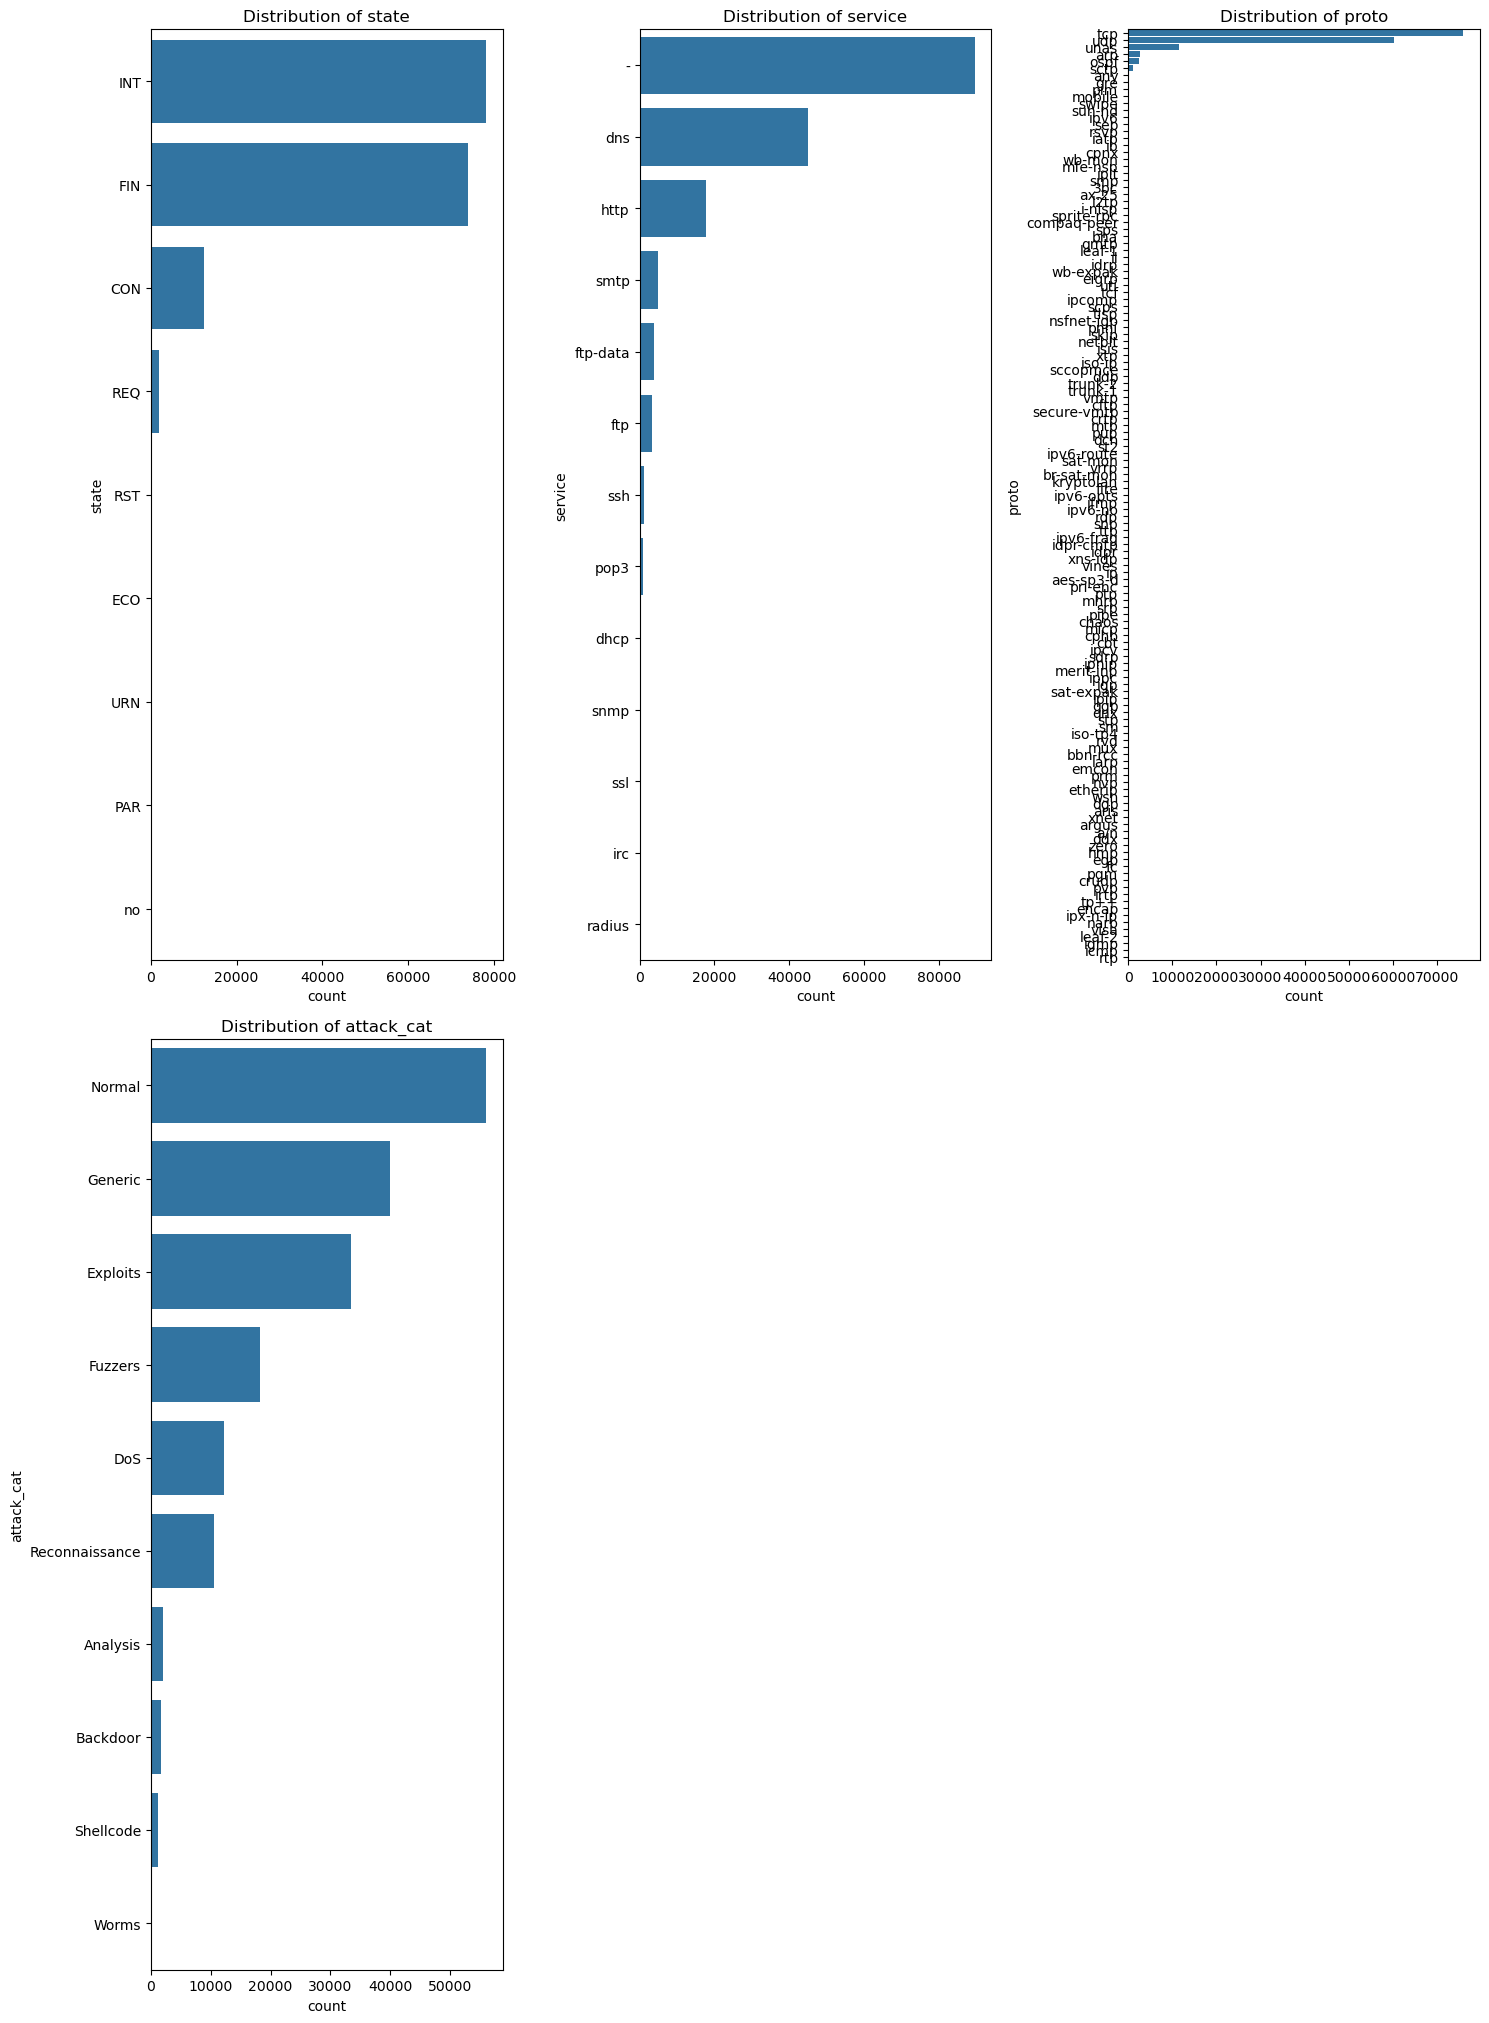

In [27]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(categorical_feats.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=categorical_feats[column], order=categorical_feats[column].value_counts().index)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

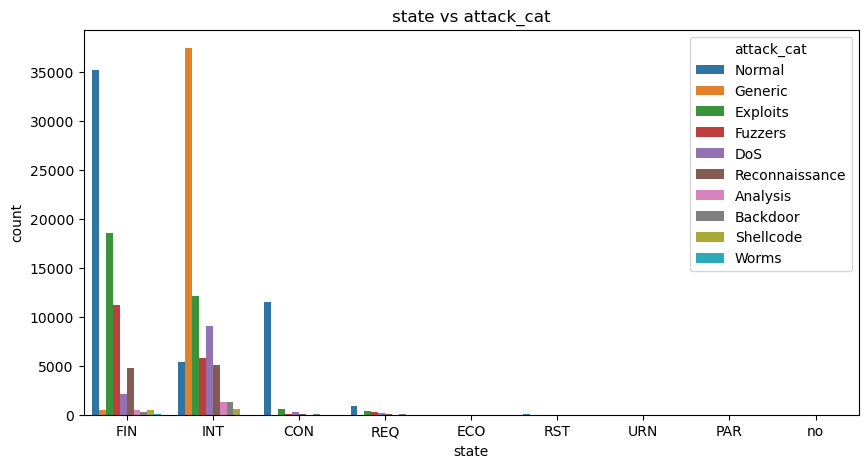

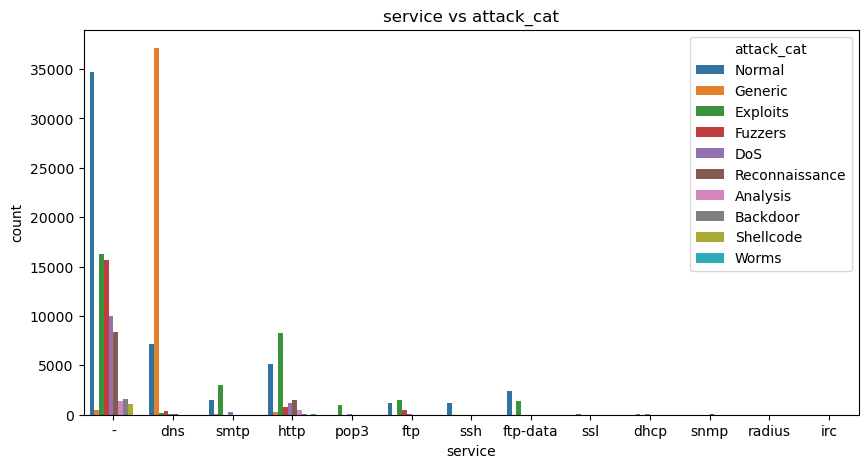

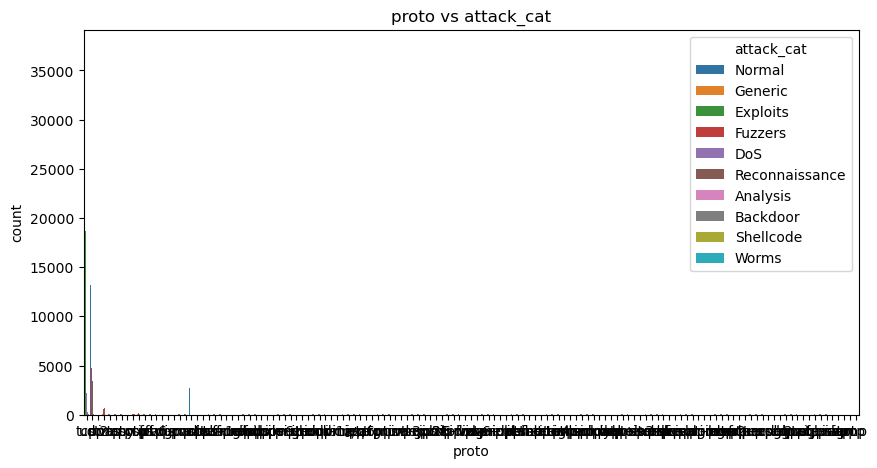

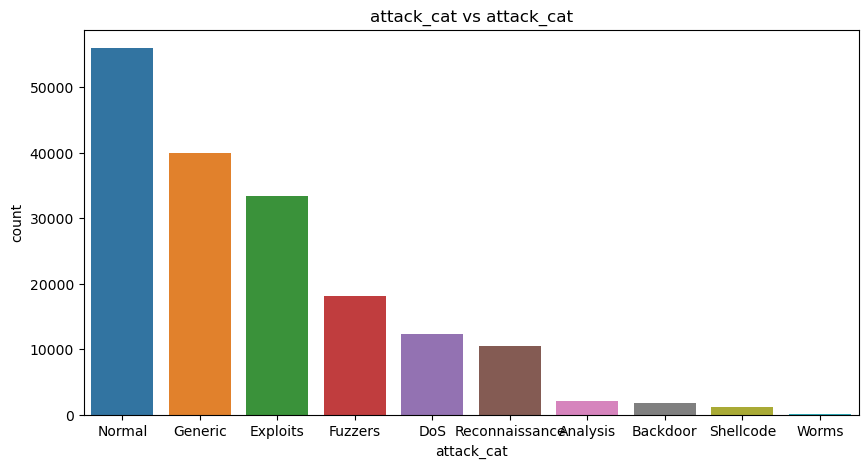

In [28]:
target_variable = 'attack_cat'

for col in categorical_feats.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue=target_variable, data=df_train)
    plt.title(f'{col} vs {target_variable}')
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [29]:
# df_train = df_train.drop(['label'], axis=1)

In [30]:
# df_train['is_ftp_login'] = np.where(df_train['is_ftp_login'] == 0, 'false', 'true')

In [31]:
# df_train['is_sm_ips_ports'] = df_train['is_sm_ips_ports'].replace({0: 'false', 1:'true'})

In [32]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(df_train, test_size = 0.2,random_state = 0) # random_state=42 optional

In [33]:
X_train = train_set.drop("attack_cat", axis = 1)
y_train = train_set["attack_cat"]
X_val = val_set.drop("attack_cat", axis = 1)
y_val = val_set["attack_cat"]

In [34]:
X_train.head()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
11435,0.0,2.0,0.0,0.0,0.0,25.0,25.0,11.0,11.0,11.0,...,0.0,udp,1,0.0,NaN,0.009,0.0,0.0,0.0,0.0
163811,0.0,2.0,0.0,0.0,0.0,7.0,7.0,3.0,7.0,3.0,...,NaN,unas,1,0.0,0.0,0.004,0.0,0.0,0.0,0.0
128511,0.0,2.0,0.0,0.0,0.0,10.0,10.0,9.0,8.0,8.0,...,0.0,nvp,1,0.0,0.0,0.001,0.0,0.0,0.0,0.0
141200,0.0,2.0,0.0,0.0,0.0,31.0,31.0,13.0,13.0,13.0,...,0.0,udp,1,0.0,0.0,0.003,0.0,0.0,0.0,0.0
126356,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,udp,1,0.0,0.0,0.001,0.0,0.0,0.0,0.0


In [35]:
numeric_feats = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_feats = X_train.select_dtypes(include='object').columns.tolist()

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [36]:
df_train.isnull().sum().sum()

359354

In [37]:
for i in numeric_feats:
    print(df_train[i].value_counts())
    print("")

0.0    163963
1.0      2632
Name: is_sm_ips_ports, dtype: int64

2.0    77981
1.0    46914
0.0    38821
6.0     1838
3.0     1152
Name: ct_state_ttl, dtype: int64

0.0     149698
1.0      15920
4.0        793
9.0         85
2.0         71
6.0         36
30.0        26
25.0        24
12.0        22
16.0        16
3.0          3
Name: ct_flw_http_mthd, dtype: int64

0.0    164251
1.0      2422
4.0        16
2.0         5
Name: is_ftp_login, dtype: int64

0.0    164056
1.0      2423
4.0        14
2.0         6
Name: ct_ftp_cmd, dtype: int64

1.0     34382
2.0     19637
3.0     15887
4.0     12613
5.0     10245
6.0      9585
7.0      6463
8.0      4948
9.0      3984
33.0     3867
10.0     3362
16.0     2652
12.0     2473
17.0     2328
11.0     2323
34.0     2210
26.0     1809
28.0     1619
32.0     1563
14.0     1555
24.0     1510
13.0     1487
29.0     1479
27.0     1439
31.0     1437
18.0     1417
30.0     1407
23.0     1347
22.0     1293
21.0     1166
25.0     1144
20.0     1026
19.0   

In [38]:
# df_train['ct_state_ttl'].value_counts()

In [39]:
# df_train['ct_flw_http_mthd'].value_counts()

In [40]:
# df_train.ct_flw_http_mthd.fillna(value=0)

In [41]:
# df_train['is_ftp_login'].value_counts()

In [42]:
# df_train['attack_cat'].value_counts()

In [43]:
# df_train['proto'].value_counts()

In [44]:
# df_train['ct_ftp_cmd'].unique()

In [45]:
# df_train['sbytes'].fillna(df_train['sbytes'].mean(), inplace=True)
# df_train['dbytes'].fillna(df_train['dbytes'].median(), inplace=True)

In [46]:
df_train.isnull().sum()

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
label                   0
sjit                 8738
djit        

In [47]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.impute import SimpleImputer, KNNImputer
# import pandas as pd
# import numpy as np

# class MissingValueHandler(BaseEstimator, TransformerMixin):
#     def __init__(self, strategy='mean', fill_value=None, n_neighbors=5):
#         self.strategy = strategy
#         self.fill_value = fill_value
#         self.n_neighbors = n_neighbors
#         self.imputer_numeric = None
#         self.imputer_categorical = None
#         self.knn_imputer = None

#     def fit(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         if self.strategy in ['mean', 'median', 'mode', 'constant']:
#             self.imputer_numeric = SimpleImputer(strategy=self.strategy, fill_value=self.fill_value)
#             self.imputer_numeric.fit(X.select_dtypes(include=np.number))
#         elif self.strategy == 'knn':
#             self.knn_imputer = KNNImputer(n_neighbors=self.n_neighbors)
#             self.knn_imputer.fit(X.select_dtypes(include=np.number))

#         if self.strategy in ['mode', 'constant']:
#             self.imputer_categorical = SimpleImputer(
#                 strategy='most_frequent' if self.strategy == 'mode' else 'constant',
#                 fill_value=self.fill_value
#             )
#             self.imputer_categorical.fit(X.select_dtypes(include='object'))

#         return self

#     def transform(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         X_transformed = X.copy()

#         # Impute numeric features
#         numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#         if self.strategy in ['mean', 'median', 'mode', 'constant'] and self.imputer_numeric is not None:
#             X_transformed[numeric_feats] = self.imputer_numeric.transform(X[numeric_feats])
#         elif self.strategy == 'knn' and self.knn_imputer is not None:
#             X_transformed[numeric_feats] = self.knn_imputer.transform(X[numeric_feats])

#         # Impute categorical features
#         categorical_feats = X.select_dtypes(include='object').columns.tolist()
#         if self.imputer_categorical is not None:
#             X_transformed[categorical_feats] = self.imputer_categorical.transform(X[categorical_feats])

#         return X_transformed


In [48]:
X_train["service"].isnull().sum()

6961

In [49]:

nan_rows = X_train[X_train["service"].isna()]
print(nan_rows[categorical_feats])

       state service proto
78821    FIN     NaN   tcp
48308    INT     NaN  unas
128970   INT     NaN   arp
20735    FIN     NaN   tcp
122262   INT     NaN   ddx
...      ...     ...   ...
119423   FIN     NaN   tcp
31921    FIN     NaN   tcp
70608    CON     NaN  sctp
101201   NaN     NaN   arp
86293    INT     NaN   udp

[6961 rows x 3 columns]


In [50]:
num_imputer = SimpleImputer(strategy='mean')
X_train[numeric_feats] = num_imputer.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = num_imputer.transform(X_val[numeric_feats])

cat_imputer = SimpleImputer(strategy='constant', fill_value="unknown")
X_train[categorical_feats] = cat_imputer.fit_transform(X_train[categorical_feats])
X_val[categorical_feats] = cat_imputer.transform(X_val[categorical_feats])

X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_val = pd.DataFrame(X_val, columns=X_val.columns)

In [51]:
nan_rows = X_train[X_train["service"] == "unknown"]
print(nan_rows[categorical_feats])

          state  service proto
78821       FIN  unknown   tcp
48308       INT  unknown  unas
128970      INT  unknown   arp
20735       FIN  unknown   tcp
122262      INT  unknown   ddx
...         ...      ...   ...
119423      FIN  unknown   tcp
31921       FIN  unknown   tcp
70608       CON  unknown  sctp
101201  unknown  unknown   arp
86293       INT  unknown   udp

[6961 rows x 3 columns]


In [52]:
# from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', Pipeline(steps=[
#             ('handle_missing', SimpleImputer(strategy='mean')), 
#         ]), numeric_feats),

#         ('cat', Pipeline(steps=[
#             ('handle_missing', SimpleImputer(strategy='constant', fill_value="unknown")), 
#             ('onehot', OneHotEncoder(handle_unknown='ignore'))
#         ]), categorical_feats)
#     ]
# )

# # Pipeline full
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Transformasi data
# X_train= pipeline.fit_transform(X_train)
# X_val= pipeline.transform(X_val)


In [ ]:
X_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
145382,0.000000,1.0,0.000000,1.0,1.00000,1.000000,9.09376,1.0,1.000000,1.000000,...,0.0,tcp,1.0,2886.073833,2504.602357,50.745526,44.407237,0.055200,0.024572,0.030628
53588,0.000000,2.0,0.000000,0.0,0.00000,41.000000,41.00000,35.0,33.000000,5.382338,...,0.0,udp,1.0,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
136915,0.000000,0.0,0.133672,0.0,0.00000,9.297292,5.00000,2.0,2.000000,2.000000,...,3924.0,tcp,0.0,9573.651527,7708.589822,100.687088,65.140942,0.000658,0.000515,0.000143
95474,0.000000,2.0,0.000000,0.0,0.01501,40.000000,40.00000,32.0,33.000000,32.000000,...,0.0,udp,1.0,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,0.000000
109446,0.000000,1.0,0.000000,0.0,0.01501,1.000000,1.00000,1.0,6.947526,5.382338,...,0.0,tcp,1.0,2025.109855,94.621797,21.530215,80.468781,0.162077,0.056390,0.105687
174970,0.000000,0.0,0.000000,1.0,1.00000,1.000000,1.00000,9.0,8.000000,1.000000,...,0.0,tcp,0.0,42.435178,1.100106,0.521706,0.500000,0.000646,0.000503,0.000143
32610,0.000000,1.0,0.000000,0.0,0.00000,3.000000,2.00000,1.0,2.000000,1.000000,...,0.0,tcp,1.0,4930.058489,253.744000,82.285131,152.395000,0.268112,0.168536,0.099576
127131,0.000000,0.0,0.000000,0.0,0.01501,6.000000,12.00000,4.0,7.000000,3.000000,...,0.0,tcp,0.0,65.563408,1.645118,0.977200,0.855412,0.041275,0.000448,0.000124
67926,0.015784,2.0,0.000000,0.0,0.00000,41.000000,41.00000,40.0,39.000000,39.000000,...,0.0,udp,1.0,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000
7050,0.000000,0.0,0.000000,0.0,0.00000,2.000000,9.09376,2.0,6.947526,2.000000,...,0.0,udp,0.0,2356.936750,0.000000,1666.612000,0.000000,0.000000,0.000000,0.000000


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [54]:
# import numpy as np
# import pandas as pd
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import RobustScaler
# from sklearn.ensemble import IsolationForest
# from sklearn.impute import SimpleImputer

# class OutlierHandler(BaseEstimator, TransformerMixin):
#     def __init__(self, 
#                  strategy='clip', 
#                  lower_threshold=None, 
#                  upper_threshold=None, 
#                  transformation=None, 
#                  model=None):
        
#         self.strategy = strategy
#         self.lower_threshold = lower_threshold
#         self.upper_threshold = upper_threshold
#         self.transformation = transformation
#         self.model = model
#         self.imputer = None
#         self.scaler = None

#     def fit(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         # Fit based on the selected strategy
#         if self.strategy == 'clip':
#             if self.lower_threshold is None or self.upper_threshold is None:
#                 raise ValueError("Lower and upper thresholds must be provided for clipping")
#         elif self.strategy == 'impute':
#             self.imputer = SimpleImputer(strategy='mean')  # Impute outliers with mean
#             self.imputer.fit(X.select_dtypes(include=np.number))
#         elif self.strategy == 'transform':
#             # No fitting required for transformation
#             pass
#         elif self.strategy == 'model':
#             if self.model is None:
#                 raise ValueError("A model (e.g., IsolationForest) must be provided for model-based outlier detection")
#             self.model.fit(X.select_dtypes(include=np.number))  # Fit model to numeric features

#         return self

#     def transform(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         X_transformed = X.copy()

#         # Apply clipping strategy
#         if self.strategy == 'clip':
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             if self.lower_threshold is not None:
#                 X_transformed[numeric_feats] = X_transformed[numeric_feats].clip(lower=self.lower_threshold)
#             if self.upper_threshold is not None:
#                 X_transformed[numeric_feats] = X_transformed[numeric_feats].clip(upper=self.upper_threshold)

#         # Apply imputation strategy
#         elif self.strategy == 'impute' and self.imputer is not None:
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             X_transformed[numeric_feats] = self.imputer.transform(X[numeric_feats])

#         # Apply transformation strategy (log, square root, etc.)
#         elif self.strategy == 'transform':
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             for column in numeric_feats:
#                 if self.transformation == 'log':
#                     X_transformed[column] = np.log1p(X_transformed[column])  # Apply log(x+1)
#                 elif self.transformation == 'sqrt':
#                     X_transformed[column] = np.sqrt(X_transformed[column])  # Apply sqrt transformation

#         # Apply model-based strategy (e.g., Isolation Forest)
#         elif self.strategy == 'model' and self.model is not None:
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             outliers = self.model.predict(X[numeric_feats])  # Returns 1 for inliers, -1 for outliers
#             for column in numeric_feats:
#                 X_transformed[column][outliers == -1] = np.nan  # Replace outliers with NaN (can be imputed later)

#         return X_transformed

In [55]:
# # Menggabungkan nama kolom dari numeric dan categorical features
# all_feature_names = numeric_feats + categorical_feats

# # Mengubah transformed_data menjadi DataFrame
# transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names, index=X_train.index)

# # Output DataFrame yang sudah diproses
# print("Transformed DataFrame:")
# print(transformed_df)

In [56]:
# import numpy as np
# import pandas as pd
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import RobustScaler
# from sklearn.ensemble import IsolationForest
# from sklearn.impute import SimpleImputer

# class OutlierHandler(BaseEstimator, TransformerMixin):
#     def __init__(self, 
#                  strategy='clip', 
#                  lower_threshold=None, 
#                  upper_threshold=None, 
#                  transformation=None, 
#                  model=None):
#         """
#         Initializes the OutlierHandler with given strategies for outlier handling.

#         Parameters:
#         strategy: string, defines the strategy to handle outliers ['clip', 'impute', 'transform', 'model']
#         lower_threshold: float, lower threshold for clipping (used only if strategy='clip')
#         upper_threshold: float, upper threshold for clipping (used only if strategy='clip')
#         transformation: string, transformation to apply ['log', 'sqrt'] (used only if strategy='transform')
#         model: sklearn model, outlier detection model (e.g., IsolationForest, One-Class SVM) (used only if strategy='model')
#         """
#         self.strategy = strategy
#         self.lower_threshold = lower_threshold
#         self.upper_threshold = upper_threshold
#         self.transformation = transformation
#         self.model = model
#         self.imputer = None
#         self.scaler = None

#     def fit(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         # Fit based on the selected strategy
#         if self.strategy == 'clip':
#             if self.lower_threshold is None or self.upper_threshold is None:
#                 raise ValueError("Lower and upper thresholds must be provided for clipping")
#         elif self.strategy == 'impute':
#             self.imputer = SimpleImputer(strategy='mean')  # Impute outliers with mean
#             self.imputer.fit(X.select_dtypes(include=np.number))
#         elif self.strategy == 'transform':
#             # No fitting required for transformation
#             pass
#         elif self.strategy == 'model':
#             if self.model is None:
#                 raise ValueError("A model (e.g., IsolationForest) must be provided for model-based outlier detection")
#             self.model.fit(X.select_dtypes(include=np.number))  # Fit model to numeric features

#         return self

#     def transform(self, X, y=None):
#         if not isinstance(X, pd.DataFrame):
#             raise ValueError("Input must be a pandas DataFrame")

#         X_transformed = X.copy()

#         # Apply clipping strategy
#         if self.strategy == 'clip':
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             if self.lower_threshold is not None:
#                 X_transformed[numeric_feats] = X_transformed[numeric_feats].clip(lower=self.lower_threshold)
#             if self.upper_threshold is not None:
#                 X_transformed[numeric_feats] = X_transformed[numeric_feats].clip(upper=self.upper_threshold)

#         # Apply imputation strategy
#         elif self.strategy == 'impute' and self.imputer is not None:
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             X_transformed[numeric_feats] = self.imputer.transform(X[numeric_feats])

#         # Apply transformation strategy (log, square root, etc.)
#         elif self.strategy == 'transform':
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             for column in numeric_feats:
#                 if self.transformation == 'log':
#                     X_transformed[column] = np.log1p(X_transformed[column])  # Apply log(x+1)
#                 elif self.transformation == 'sqrt':
#                     X_transformed[column] = np.sqrt(X_transformed[column])  # Apply sqrt transformation

#         # Apply model-based strategy (e.g., Isolation Forest)
#         elif self.strategy == 'model' and self.model is not None:
#             numeric_feats = X.select_dtypes(include=np.number).columns.tolist()
#             outliers = self.model.predict(X[numeric_feats])  # Returns 1 for inliers, -1 for outliers
#             for column in numeric_feats:
#                 X_transformed[column][outliers == -1] = np.nan  # Replace outliers with NaN (can be imputed later)

#         return X_transformed

In [57]:
# num_features = X_train.shape[1]

# num_cols = 3
# num_rows = (num_features + num_cols - 1) // num_cols

# plt.figure(figsize=(15, num_rows * 5))

# for i, column in enumerate(X_train.columns, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.boxplot(data=X_train[column])
#     plt.title(f'Boxplot of {column}')
#     plt.xlabel(column)

# plt.tight_layout()
# plt.show()

In [58]:
def outlier_summary(dataframe):
    outlier_counts = {}
    total_counts = {}

    overall_outlier_count = 0
    overall_total_count = 0

    for column in dataframe.select_dtypes(include='number').columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = (dataframe[column] < lower_bound).sum() + (dataframe[column] > upper_bound).sum()
        outlier_counts[column] = outlier_count

        total_count = dataframe[column].count()
        total_counts[column] = total_count

        overall_outlier_count += outlier_count
        overall_total_count += total_count

    summary = []
    for feature in dataframe.select_dtypes(include='number').columns:
        count = outlier_counts[feature]
        total = total_counts[feature]
        if total > 0:
            percentage_outliers = (count / total) * 100
        else:
            percentage_outliers = 0

        summary.append({'Feature': feature, 'Outliers Count': count, 'Percentage of Outliers': f"{percentage_outliers:.2f}%"})

    if overall_total_count > 0:
        overall_percentage_outliers = (overall_outlier_count / overall_total_count) * 100
    else:
        overall_percentage_outliers = 0

    summary.append({'Feature': 'Overall', 
                    'Outliers Count': overall_outlier_count, 
                    'Percentage of Outliers': f"{overall_percentage_outliers:.2f}%"})

    return pd.DataFrame(summary)

In [59]:
outlier_summary_df = outlier_summary(X_train)
print(outlier_summary_df)

              Feature  Outliers Count Percentage of Outliers
0     is_sm_ips_ports            9076                  6.47%
1        ct_state_ttl            1487                  1.06%
2    ct_flw_http_mthd           20566                 14.66%
3        is_ftp_login            8864                  6.32%
4          ct_ftp_cmd            8996                  6.41%
5          ct_srv_src           18152                 12.94%
6          ct_srv_dst           18223                 12.99%
7          ct_dst_ltm           24207                 17.26%
8          ct_src_ltm           14428                 10.29%
9    ct_src_dport_ltm           25405                 18.11%
10   ct_dst_sport_ltm           26027                 18.55%
11     ct_dst_src_ltm           19461                 13.87%
12                 id               0                  0.00%
13                dur            9708                  6.92%
14             sbytes           20553                 14.65%
15             dbytes   

In [60]:
for column in X_train[numeric_feats]:
     X_train[column] = np.log1p(X_train[column])

In [61]:
X_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
23928,0.0,0.000000,0.000000,0.014935,0.0,1.791759,1.791759,1.386294,0.693147,0.693147,...,0.000000,tcp,0.000000,6.157433,6.151028,2.166879,2.138009,0.000596,0.000475,0.000121
67802,0.0,1.098612,0.000000,0.000000,0.0,3.295837,3.295837,2.944439,2.890372,1.853534,...,0.000000,udp,0.693147,0.000000,0.000000,0.004988,0.000000,0.000000,0.000000,0.000000
40426,0.0,0.000000,0.000000,0.000000,0.0,1.945910,1.791759,1.945910,1.609438,0.693147,...,0.000000,udp,0.000000,0.498241,0.255494,0.379578,0.190896,0.000000,0.000000,0.000000
175327,0.0,0.000000,0.693147,0.000000,0.0,1.386294,1.098612,1.791759,1.609438,0.693147,...,4.418841,tcp,0.000000,5.642540,2.078913,1.762404,1.555216,0.000665,0.000518,0.020198
129200,0.0,1.098612,0.000000,0.000000,0.0,3.828641,3.828641,3.526361,3.526361,3.526361,...,0.000000,udp,0.693147,8.503309,0.000000,0.005982,0.000000,0.000000,0.000000,0.000000
148335,0.0,0.834749,0.000000,0.000000,0.0,1.386294,1.386294,0.693147,1.098612,0.693147,...,0.000000,unas,0.693147,0.000000,0.000000,0.002996,0.000000,0.000000,0.000000,0.000000
38240,0.0,1.098612,0.000000,0.000000,0.0,2.564949,2.564949,2.564949,2.564949,2.564949,...,0.000000,udp,0.693147,0.000000,0.000000,0.009950,0.000000,0.000000,0.000000,0.000000
131710,0.0,0.693147,0.693147,0.000000,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.000000,tcp,0.693147,6.818965,4.249400,2.295626,3.466289,0.082035,0.035311,0.048363
46833,0.0,0.693147,0.000000,0.000000,0.0,1.609438,2.311917,1.609438,1.609438,1.609438,...,0.000000,tcp,0.693147,12.323807,8.952777,6.900436,7.666815,0.040445,0.067856,0.057776
148445,0.0,0.693147,0.000000,0.000000,0.0,1.098612,1.098612,0.693147,0.693147,0.693147,...,0.000000,tcp,0.000000,9.007457,5.722148,4.998411,4.473892,0.040445,0.058252,0.020198


In [62]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

for column in numeric_feats:
    X_train[column] = np.clip(X_train[column], lower_limit[column], upper_limit[column])

In [63]:
outlier_summary_df = outlier_summary(X_train)
print(outlier_summary_df)

              Feature  Outliers Count Percentage of Outliers
0     is_sm_ips_ports               0                  0.00%
1        ct_state_ttl               0                  0.00%
2    ct_flw_http_mthd               0                  0.00%
3        is_ftp_login               0                  0.00%
4          ct_ftp_cmd               0                  0.00%
5          ct_srv_src               0                  0.00%
6          ct_srv_dst               0                  0.00%
7          ct_dst_ltm               0                  0.00%
8          ct_src_ltm               0                  0.00%
9    ct_src_dport_ltm               0                  0.00%
10   ct_dst_sport_ltm               0                  0.00%
11     ct_dst_src_ltm               0                  0.00%
12                 id               0                  0.00%
13                dur               0                  0.00%
14             sbytes               0                  0.00%
15             dbytes   

In [64]:
X_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
12021,0.0,0.084950,0.0,0.0,0.0,1.609438,1.098612,0.693147,1.609438,0.693147,...,0.0,udp,0.000000,0.000000,0.000000,0.005982,0.006976,0.000000,0.000000,0.000000
106616,0.0,1.098612,0.0,0.0,0.0,3.218876,3.218876,2.944439,2.890372,2.890372,...,0.0,udp,0.693147,0.000000,0.000000,0.003992,0.000000,0.000000,0.000000,0.000000
72811,0.0,1.098612,0.0,0.0,0.0,2.302585,2.302585,1.945910,1.945910,1.791759,...,0.0,unas,0.693147,0.000000,0.000000,0.004988,0.000000,0.000000,0.000000,0.000000
95761,0.0,1.098612,0.0,0.0,0.0,2.890372,2.890372,2.890372,2.890372,2.890372,...,0.0,udp,0.693147,0.000000,0.000000,0.004988,0.000000,0.000000,0.000000,0.000000
105909,0.0,1.098612,0.0,0.0,0.0,2.564949,2.564949,1.791759,1.791759,1.609438,...,0.0,unas,0.693147,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000
20705,0.0,0.084950,0.0,0.0,0.0,0.693147,1.609438,1.945910,0.693147,0.693147,...,0.0,tcp,0.000000,9.088239,8.955722,4.542940,4.277381,0.001232,0.001051,0.000181
135146,0.0,1.098612,0.0,0.0,0.0,0.693147,1.098612,1.098612,0.693147,0.693147,...,0.0,udp,0.000000,8.503309,0.000000,0.004988,0.000000,0.000000,0.000000,0.000000
88911,0.0,1.098612,0.0,0.0,0.0,1.386294,1.386294,0.693147,1.386294,0.693147,...,0.0,ipcomp,0.693147,0.000000,0.000000,0.002996,0.000000,0.000000,0.000000,0.020198
53930,0.0,1.098612,0.0,0.0,0.0,3.367296,3.367296,2.890372,2.890372,2.890372,...,0.0,udp,0.693147,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000
166711,0.0,1.098612,0.0,0.0,0.0,3.663562,3.663562,3.610918,3.610918,3.594115,...,0.0,udp,0.693147,0.000000,0.000000,0.010940,0.000000,0.000000,0.020790,0.000000


In [65]:
# for column in numeric_feats:
#     median_value = X_train[column].median()
    
#     X_train[column] = X_train[column].apply(lambda x: median_value if x < lower_limit[column] or x > upper_limit[column] else x)

In [66]:
X_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
81569,0.0,0.693147,0.0,0.0,0.0,0.693147,0.693147,0.693147,1.098612,0.693147,...,0.0,tcp,0.000000,8.313525,5.296995,4.358212,4.820791,0.135923,0.051975,0.079765
158185,0.0,1.098612,0.0,0.0,0.0,3.737670,3.737670,3.401197,3.401197,3.401197,...,0.0,udp,0.693147,0.000000,0.000000,0.007968,0.000000,0.000000,0.000000,0.000000
95968,0.0,0.084950,0.0,0.0,0.0,0.693147,0.693147,1.609438,2.072861,1.853534,...,0.0,tcp,0.000000,5.817332,5.784818,6.900436,4.473892,0.000745,0.000598,0.000147
94954,0.0,0.693147,0.0,0.0,0.0,1.386294,0.693147,1.098612,1.609438,0.693147,...,0.0,tcp,0.693147,8.932854,6.402687,4.906564,5.070741,0.135923,0.051975,0.079765
72709,0.0,1.098612,0.0,0.0,0.0,2.331881,3.091042,1.972655,2.944439,2.944439,...,0.0,udp,0.693147,0.000000,0.000000,0.007968,4.473892,0.000000,0.000000,0.000000
169548,0.0,0.084950,0.0,0.0,0.0,0.693147,1.098612,1.386294,1.945910,0.693147,...,0.0,tcp,0.000000,6.895802,3.576403,2.317122,2.610217,0.000674,0.000548,0.000126
149397,0.0,0.084950,0.0,0.0,0.0,2.079442,1.609438,1.386294,1.098612,0.693147,...,0.0,tcp,0.000000,3.826675,3.783003,0.474477,0.455247,0.000702,0.000583,0.000119
163790,0.0,0.084950,0.0,0.0,0.0,2.995732,2.890372,2.944439,3.091042,2.564949,...,0.0,tcp,0.000000,4.228344,0.888027,0.695611,0.629267,0.000636,0.000488,0.000148
602,0.0,1.098612,0.0,0.0,0.0,3.555348,3.555348,2.564949,2.564949,2.564949,...,0.0,udp,0.693147,0.000000,0.000000,6.900436,0.000000,0.000000,0.000000,0.000000
138115,0.0,1.098612,0.0,0.0,0.0,3.850148,3.850148,3.761200,3.761200,3.594115,...,0.0,udp,0.693147,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000


In [67]:
outlier_summary_df = outlier_summary(X_train)
print(outlier_summary_df)

              Feature  Outliers Count Percentage of Outliers
0     is_sm_ips_ports               0                  0.00%
1        ct_state_ttl               0                  0.00%
2    ct_flw_http_mthd               0                  0.00%
3        is_ftp_login               0                  0.00%
4          ct_ftp_cmd               0                  0.00%
5          ct_srv_src               0                  0.00%
6          ct_srv_dst               0                  0.00%
7          ct_dst_ltm               0                  0.00%
8          ct_src_ltm               0                  0.00%
9    ct_src_dport_ltm               0                  0.00%
10   ct_dst_sport_ltm               0                  0.00%
11     ct_dst_src_ltm               0                  0.00%
12                 id               0                  0.00%
13                dur               0                  0.00%
14             sbytes               0                  0.00%
15             dbytes   

In [68]:
X_train.shape

(140272, 43)

In [69]:
X_train

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
11435,0.0,1.098612,0.0,0.0,0.0,3.258097,3.258097,2.484907,2.484907,2.484907,...,0.0,udp,0.693147,0.000000,6.402687,0.008960,0.000000,0.000000,0.000000,0.000000
163811,0.0,1.098612,0.0,0.0,0.0,2.079442,2.079442,1.386294,2.079442,1.386294,...,0.0,unas,0.693147,0.000000,0.000000,0.003992,0.000000,0.000000,0.000000,0.000000
128511,0.0,1.098612,0.0,0.0,0.0,2.397895,2.397895,2.302585,2.197225,2.197225,...,0.0,nvp,0.693147,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
141200,0.0,1.098612,0.0,0.0,0.0,3.465736,3.465736,2.639057,2.639057,2.639057,...,0.0,udp,0.693147,0.000000,0.000000,0.002996,0.000000,0.000000,0.000000,0.000000
126356,0.0,1.098612,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.0,udp,0.693147,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95939,0.0,0.693147,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.0,tcp,0.693147,8.217509,7.470830,4.052764,2.617810,0.113458,0.051975,0.060918
152315,0.0,0.084950,0.0,0.0,0.0,1.386294,1.609438,1.098612,1.386294,0.693147,...,0.0,tcp,0.000000,2.929666,0.349080,0.245251,0.235742,0.000566,0.000458,0.000108
117952,0.0,1.098612,0.0,0.0,0.0,0.693147,0.693147,1.972655,0.693147,0.693147,...,0.0,udp,0.693147,0.000000,0.000000,0.004988,0.000000,0.000000,0.000000,0.000000
173685,0.0,1.098612,0.0,0.0,0.0,3.526361,3.526361,1.972655,3.526361,3.526361,...,0.0,udp,0.693147,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [70]:
X_train.drop_duplicates(inplace=True)

y_train = y_train[X_train.index]

In [71]:
X_train.shape

(140222, 43)

In [72]:
y_train.shape

(140222,)

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### Feature Selection

In [73]:
corr_matrix = X_train[numeric_feats].corr()

corr_matrix

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
is_sm_ips_ports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ct_state_ttl,NaN,1.000000,NaN,NaN,NaN,0.319672,0.318716,0.252307,0.257140,0.442115,...,NaN,NaN,0.688101,-0.352647,-0.435081,-0.120785,-0.294095,-0.071960,-0.075674,-0.068303
ct_flw_http_mthd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_ftp_login,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ct_ftp_cmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ct_srv_src,NaN,0.319672,NaN,NaN,NaN,1.000000,0.883988,0.754771,0.712726,0.786978,...,NaN,NaN,0.138020,-0.476017,-0.424748,-0.426212,-0.428363,-0.383150,-0.370041,-0.392088
ct_srv_dst,NaN,0.318716,NaN,NaN,NaN,0.883988,1.000000,0.785932,0.706601,0.792889,...,NaN,NaN,0.127836,-0.498920,-0.445170,-0.441187,-0.454481,-0.417760,-0.403241,-0.426107
ct_dst_ltm,NaN,0.252307,NaN,NaN,NaN,0.754771,0.785932,1.000000,0.786429,0.842909,...,NaN,NaN,0.139560,-0.440773,-0.392608,-0.378595,-0.410518,-0.413931,-0.402029,-0.415098
ct_src_ltm,NaN,0.257140,NaN,NaN,NaN,0.712726,0.706601,0.786429,1.000000,0.786001,...,NaN,NaN,0.159209,-0.428901,-0.386089,-0.376863,-0.398591,-0.390085,-0.377310,-0.392261
ct_src_dport_ltm,NaN,0.442115,NaN,NaN,NaN,0.786978,0.792889,0.842909,0.786001,1.000000,...,NaN,NaN,0.329468,-0.465932,-0.431102,-0.367414,-0.400302,-0.342870,-0.334982,-0.342720


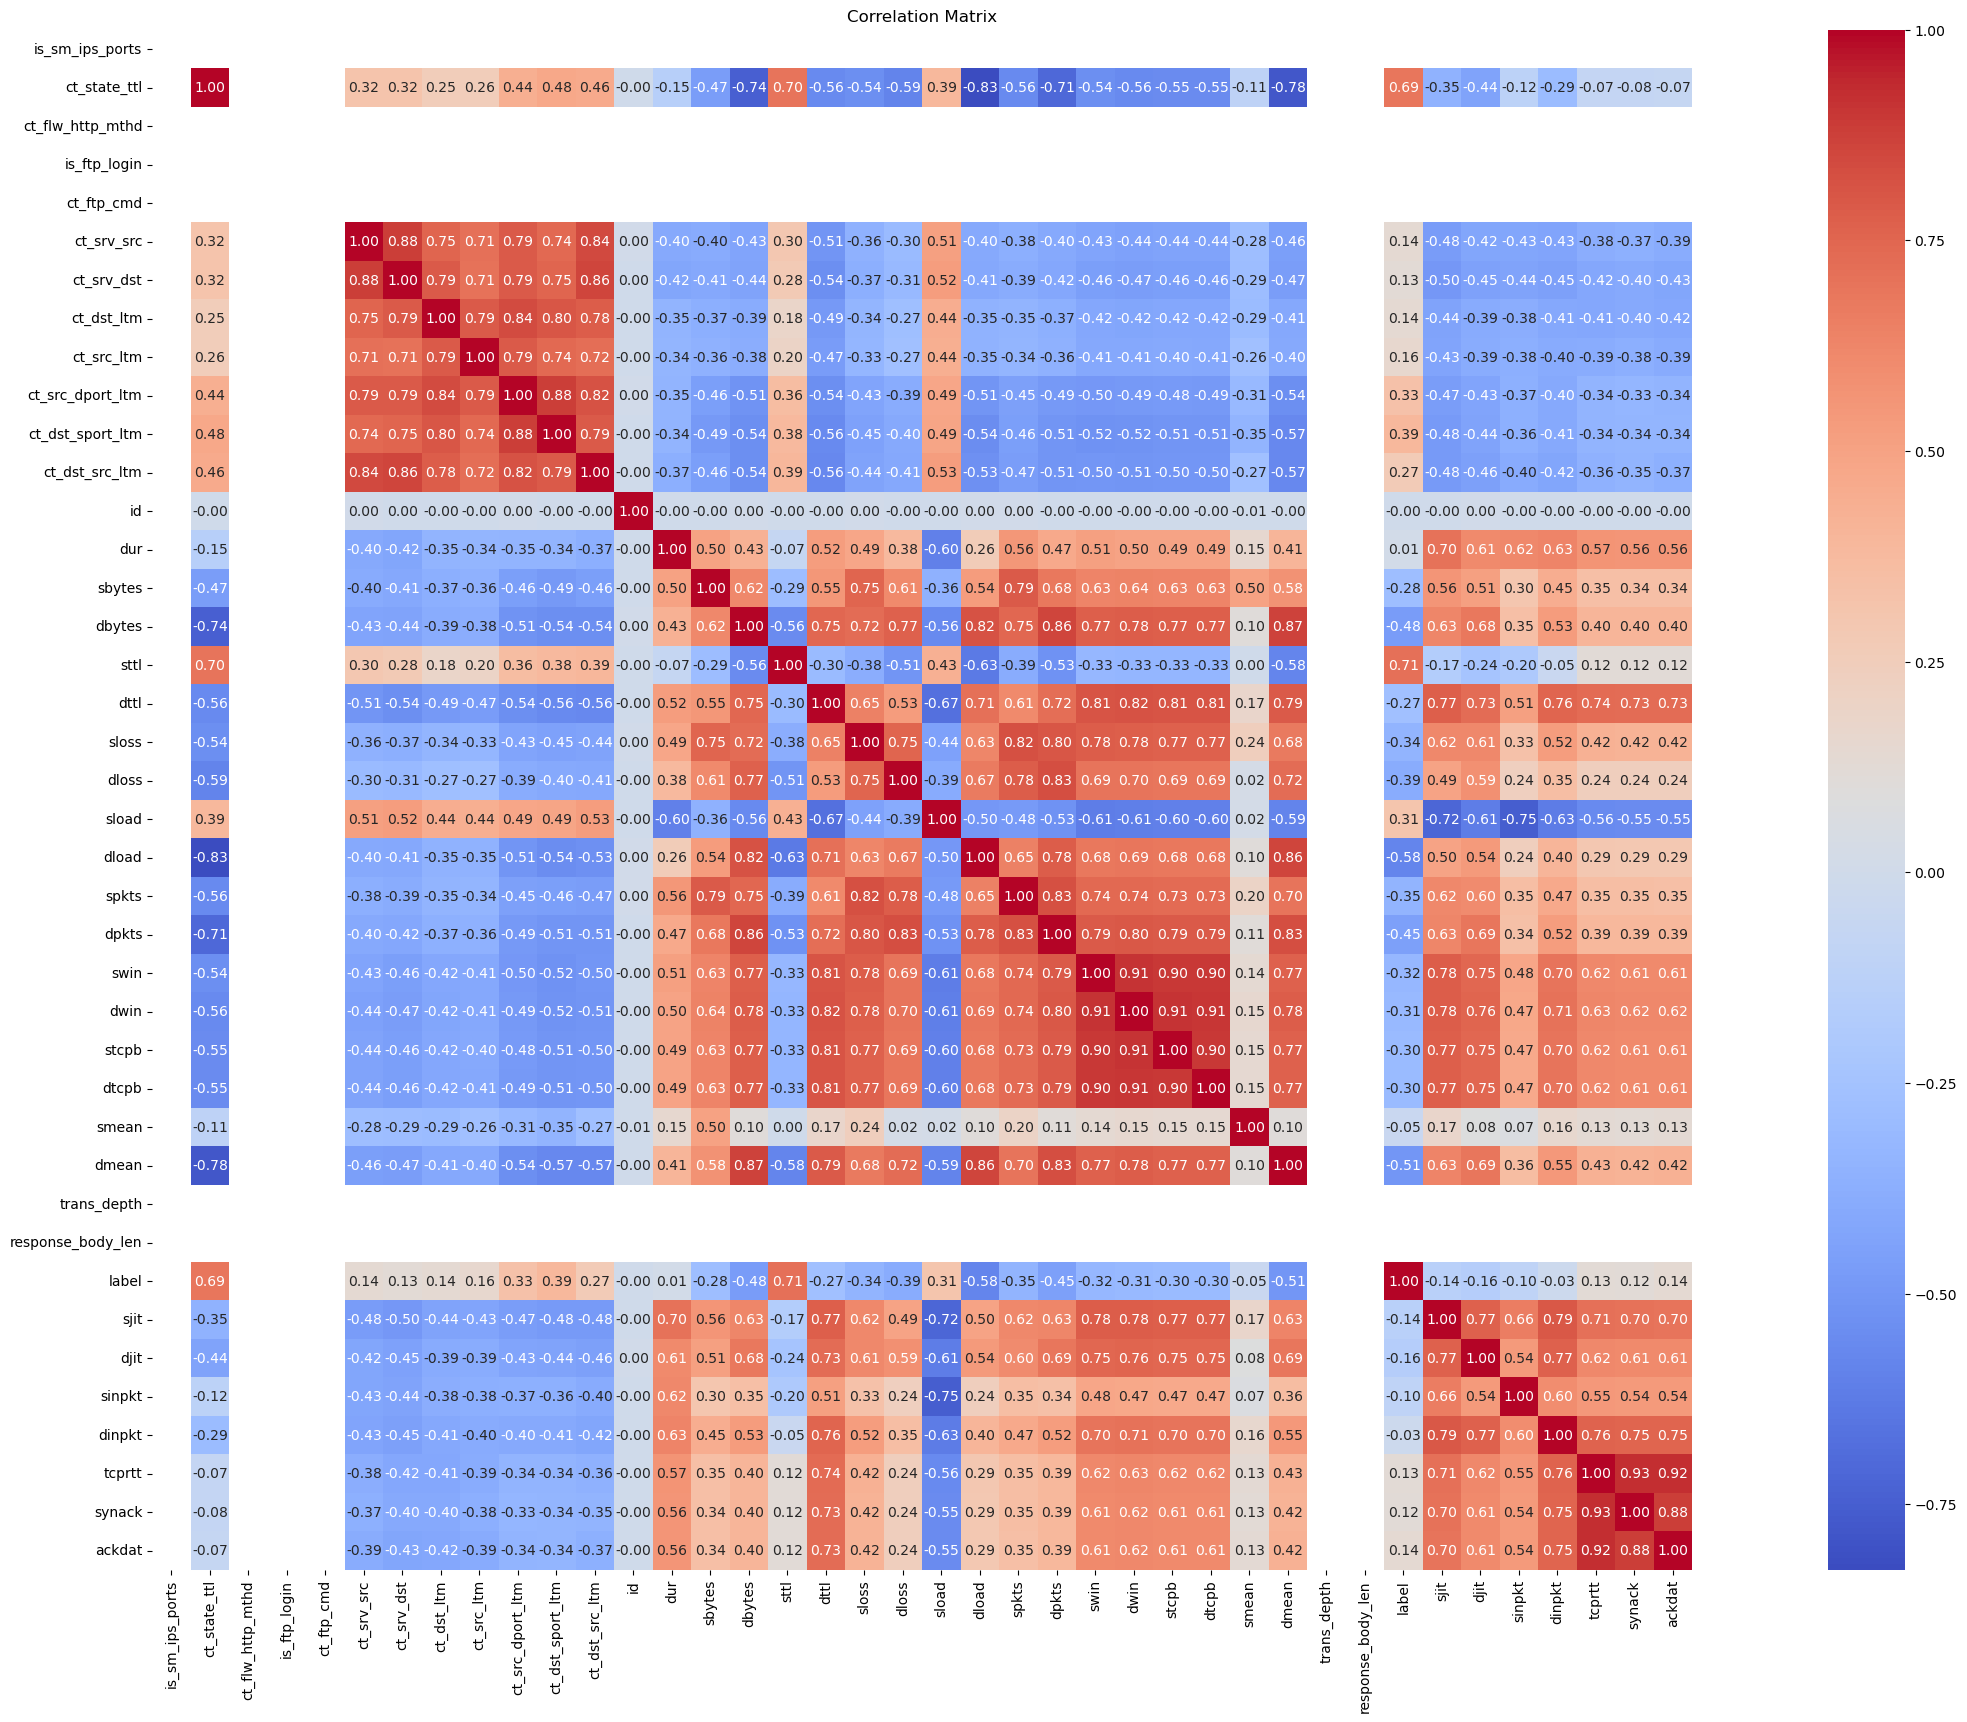

In [74]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [75]:
corr_threshold = 0.8

to_drop = ["id", "label"]

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= corr_threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)

X_train = X_train.drop(columns=to_drop)

print(f"Dropped column: {to_drop}")

print(f"Remaining features after dropping highly correlated ones: {X_train.columns}")

Dropped column: ['id', 'label', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_dst_src_ltm', 'ct_dst_src_ltm', 'dload', 'dload', 'spkts', 'dpkts', 'dpkts', 'dpkts', 'dpkts', 'swin', 'dwin', 'dwin', 'stcpb', 'stcpb', 'stcpb', 'dtcpb', 'dtcpb', 'dtcpb', 'dtcpb', 'dmean', 'dmean', 'dmean', 'synack', 'ackdat', 'ackdat']
Remaining features after dropping highly correlated ones: Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'state', 'dur',
       'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'sload', 'smean', 'trans_depth', 'response_body_len', 'proto', 'sjit',
       'djit', 'sinpkt', 'dinpkt', 'tcprtt'],
      dtype='object')


In [76]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table, correction=False)[0]
    n = contingency_table.sum().sum()
    minimum_dimension = min(contingency_table.shape) - 1 
    return np.sqrt((chi2 / n) / minimum_dimension)

In [77]:
# cramer_v_matrix = pd.DataFrame(index=categorical_feats, columns=categorical_feats)

# for i in range(len(categorical_feats)):
#     for j in range(len(categorical_feats)):
#         if i != j:
#             cramer_v_matrix.iloc[i, j] = cramers_v(categorical_feats[categorical_feats[i]], categorical_feats[categorical_feats[j]])
#         else:
#             cramer_v_matrix.iloc[i, j] = 1.0

# print(cramer_v_matrix)

In [78]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(cramer_v_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
# plt.title("Cramér's V Heatmap")
# plt.show()

In [79]:
X_train

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,state,dur,...,sload,smean,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt
11435,0.0,1.098612,0.0,0.0,0.0,3.258097,2.484907,2.484907,INT,8.999960e-06,...,17.740779,4.060443,0.0,0.0,udp,0.000000,6.402687,0.008960,0.000000,0.000000
163811,0.0,1.098612,0.0,0.0,0.0,2.079442,1.386294,2.079442,INT,3.999992e-06,...,19.113828,4.615121,0.0,0.0,unas,0.000000,0.000000,0.003992,0.000000,0.000000
128511,0.0,1.098612,0.0,0.0,0.0,2.397895,2.302585,2.197225,INT,9.999995e-07,...,20.394762,4.510860,0.0,0.0,nvp,0.000000,0.000000,0.001000,0.000000,0.000000
141200,0.0,1.098612,0.0,0.0,0.0,3.465736,2.639057,2.639057,INT,2.999996e-06,...,18.110992,4.926191,0.0,0.0,udp,0.000000,0.000000,0.002996,0.000000,0.000000
126356,0.0,1.098612,0.0,0.0,0.0,0.693147,0.693147,0.693147,INT,9.999995e-07,...,20.325769,4.442651,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95939,0.0,0.693147,0.0,0.0,0.0,0.693147,0.693147,0.693147,FIN,7.946012e-01,...,9.171496,4.248495,0.0,0.0,tcp,8.217509,7.470830,4.052764,2.617810,0.113458
152315,0.0,0.084950,0.0,0.0,0.0,1.386294,1.098612,1.386294,FIN,3.313879e-02,...,14.426100,4.926191,0.0,0.0,tcp,2.929666,0.349080,0.245251,0.235742,0.000566
117952,0.0,1.098612,0.0,0.0,0.0,0.693147,1.972655,0.693147,INT,4.999988e-06,...,18.716331,4.442651,0.0,0.0,udp,0.000000,0.000000,0.004988,0.000000,0.000000
173685,0.0,1.098612,0.0,0.0,0.0,3.526361,1.972655,3.526361,INT,8.999960e-06,...,17.740779,4.060443,0.0,0.0,udp,0.000000,0.000000,0.008960,0.000000,0.000000


In [80]:
X_train.select_dtypes(exclude=np.number).columns

Index(['state', 'service', 'proto'], dtype='object')

In [81]:
X_train.select_dtypes(include=np.number).columns

Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'smean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt'],
      dtype='object')

In [82]:
# There are binary columns also nummerical but binary: 'is_sm_ips_ports', 'is_ftp_login'

for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(X_train[col].value_counts())
    print()

0.0    140222
Name: is_sm_ips_ports, dtype: int64

0.0    140222
Name: is_ftp_login, dtype: int64



In [83]:
X_train['is_ftp_login'] = np.where(X_train['is_ftp_login']>1, 1, X_train['is_ftp_login'])

In [84]:
X_train['is_ftp_login'].value_counts()

0.0    140222
Name: is_ftp_login, dtype: int64

In [85]:
X_train.sample(10)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,state,dur,...,sload,smean,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt
166524,0.0,1.098612,0.0,0.0,0.0,2.197225,1.098612,1.098612,INT,0.000008,...,18.420681,4.926191,0.0,0.0,visa,0.000000,0.000000,0.007968,0.000000,0.000000
6786,0.0,1.098612,0.0,0.0,0.0,2.331881,1.098612,0.693147,INT,0.000003,...,19.227157,4.926191,0.0,0.0,udp,0.000000,0.000000,0.002996,0.000000,0.000000
116784,0.0,1.098612,0.0,0.0,0.0,1.386294,1.098612,1.098612,INT,0.000002,...,19.806975,4.615121,0.0,0.0,unas,0.000000,0.000000,0.001998,0.000000,0.000000
95750,0.0,0.693147,0.0,0.0,0.0,0.693147,1.972655,0.693147,FIN,0.594692,...,8.937525,4.465908,0.0,0.0,tcp,8.571203,5.265958,4.494138,4.658192,0.116794
100620,0.0,0.693147,0.0,0.0,0.0,1.098612,0.693147,0.693147,FIN,0.166035,...,10.530198,4.553877,0.0,0.0,tcp,6.916127,4.124107,2.983677,3.576880,0.050851
38807,0.0,1.098612,0.0,0.0,0.0,1.609438,0.693147,1.098612,INT,0.000004,...,18.939475,4.442651,0.0,0.0,udp,0.000000,0.000000,0.003992,0.000000,0.000000
101219,0.0,1.098612,0.0,0.0,0.0,3.555348,2.833213,2.833213,INT,0.000006,...,18.146244,4.060443,0.0,0.0,udp,8.503309,0.000000,0.005982,0.000000,0.000000
173612,0.0,0.084950,0.0,0.0,0.0,0.693147,1.609438,1.386294,FIN,0.512909,...,12.992173,5.447137,0.0,0.0,tcp,7.037603,3.652945,2.648474,2.899662,0.000731
3632,0.0,0.834749,0.0,0.0,0.0,1.098612,0.693147,0.693147,FIN,0.858969,...,8.505070,4.043051,0.0,0.0,tcp,8.788631,5.042181,4.526464,4.724854,0.081085
41180,0.0,1.098612,0.0,0.0,0.0,1.945910,1.098612,1.098612,INT,0.000009,...,18.302898,4.615121,0.0,0.0,xns-idp,0.000000,0.000000,0.008960,0.000000,0.000000


In [86]:
X_train.shape

(140222, 27)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [87]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [88]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method='standard'):
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        if self.method == 'minmax':
            self.min_ = X.min(axis=0)
            self.max_ = X.max(axis=0)
        elif self.method == 'standard':
            self.mean_ = X.mean(axis=0)
            self.std_ = X.std(axis=0)
            # Ensure no division by zero by replacing 0 standard deviation with a small value
            self.std_ = np.where(self.std_ == 0, 1e-6, self.std_)  # Replace zero std with a small value (1e-6)
        elif self.method == 'robust':
            self.q1_ = X.quantile(0.25, axis=0)
            self.q3_ = X.quantile(0.75, axis=0)
            self.iqr_ = self.q3_ - self.q1_
        elif self.method == 'log':
            pass
        else:
            raise ValueError(f"Unknown scaling method: {self.method}")
        return self

    def transform(self, X):
        if self.method == 'minmax':
            return (X - self.min_) / (self.max_ - self.min_)
        elif self.method == 'standard':
            return (X - self.mean_) / self.std_
        elif self.method == 'robust':
            # Avoid division by zero in IQR
            return (X - self.q1_) / np.where(self.iqr_ == 0, np.nan, self.iqr_)  # Replace zero IQR with NaN to avoid division by zero
        elif self.method == 'log':
            # Ensure all values are positive before applying log
            if (X <= 0).any():
                raise ValueError("Log transformation requires all values to be positive.")
            return np.log1p(X)
        else:
            raise ValueError(f"Unknown scaling method: {self.method}")

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [89]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method='onehot', target=None, columns=None):
        """
        Initialize the encoder with a specific method.
        :param method: The encoding method ('onehot', 'label', 'target').
        :param target: The target column for target encoding (if method == 'target').
        :param columns: List of columns to apply encoding to (optional).
        """
        self.method = method
        self.target = target
        self.columns = columns
        self.encoder = None
        self.label_encoder = None
        self.target_means = None

    def fit(self, X, y=None):
        """
        Fit the encoder based on the specified method.
        """
        if self.method == 'onehot':
            # One-hot encoding for all specified columns
            self.encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
            X_encoded = X[self.columns] if self.columns else X
            self.encoder.fit(X_encoded)
        
        elif self.method == 'label':
            # Label encoding for each column (use only for ordinal data)
            self.label_encoder = {}
            for column in X.columns:
                if self.columns is None or column in self.columns:
                    le = LabelEncoder()
                    le.fit(X[column])
                    self.label_encoder[column] = le
        
        elif self.method == 'target' and y is not None:
            # Calculate the mean target per category
            self.target_means = X.groupby(self.target).mean()
        
        else:
            raise ValueError(f"Unknown encoding method: {self.method}")

        return self

    def transform(self, X, y=None):
        """
        Transform the categorical features based on the fitted encoding method.
        """
        if self.method == 'onehot':
            # Apply one-hot encoding
            X_encoded = X[self.columns] if self.columns else X
            return self.encoder.transform(X_encoded)  # This returns a dense matrix by default

        elif self.method == 'label':
            # Apply label encoding
            X_transformed = X.copy()
            for column in X.columns:
                if column in self.label_encoder:
                    X_transformed[column] = self.label_encoder[column].transform(X[column])
            return X_transformed

        elif self.method == 'target' and y is not None:
            # Replace categories with their target mean
            X_transformed = X.copy()
            X_transformed = X_transformed.replace(self.target_means.to_dict())
            return X_transformed

        else:
            raise ValueError(f"Unknown encoding method: {self.method}")

    def fit_transform(self, X, y=None):
        """
        Fit and transform the data.
        """
        return self.fit(X, y).transform(X, y)



### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [90]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from sklearn.base import BaseEstimator, TransformerMixin

class ClassImbalanceHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='smote', sampling_strategy='auto', random_state=None):
        """
        Initializes the resampler for handling class imbalance.
        :param method: Resampling technique ('smote', 'undersample', 'oversample', 'near_miss').
        :param sampling_strategy: Defines the sampling strategy for resampling.
        :param random_state: Random state for reproducibility.
        """
        self.method = method
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.sampler = None

    def fit(self, X, y):
        """
        Fit the resampler on the training data.
        """
        if self.method == 'smote':
            self.sampler = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        elif self.method == 'undersample':
            self.sampler = RandomUnderSampler(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        elif self.method == 'oversample':
            self.sampler = RandomOverSampler(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        elif self.method == 'near_miss':
            self.sampler = NearMiss(sampling_strategy=self.sampling_strategy, version=1)
        else:
            raise ValueError(f"Unknown resampling method: {self.method}")

        # Fit the sampler on the training data
        self.sampler.fit(X, y)
        return self

    def transform(self, X, y=None):
        """
        Apply resampling to the data.
        """
        if self.sampler is None:
            raise ValueError("Sampler not fitted. Please call fit first.")

        # Perform resampling and return the resampled dataset
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled, y_resampled

    def fit_transform(self, X, y):
        """
        Fit the resampler on the training data and return the resampled data.
        """
        return self.fit(X, y).transform(X, y)


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [91]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin

class ZScoreNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X, y=None):
        """
        Fit the Z-score normalizer to the data by calculating mean and std.
        """
        if isinstance(X, csr_matrix):
            # Calculate mean and std for sparse matrix
            self.mean_ = np.array(X.mean(axis=0)).flatten()
            self.std_ = np.sqrt(np.array(X.multiply(X).mean(axis=0)).flatten() - self.mean_ ** 2)
        else:
            # For dense data (e.g., DataFrame or ndarray)
            self.mean_ = X.mean(axis=0)
            self.std_ = X.std(axis=0)
            
        # Handle edge case of zero standard deviation
        self.std_ = np.where(self.std_ == 0, 1, self.std_)
        
        return self

    def transform(self, X):
        """
        Apply Z-score normalization to the data.
        """
        if isinstance(X, csr_matrix):
            # Normalize sparse matrix using broadcasting
            X_normalized = X.copy()
            X_normalized = X_normalized.multiply(1 / self.std_)  # Normalize each feature
            X_normalized = X_normalized - self.mean_ / self.std_  # Subtract the mean (broadcasted)
            return X_normalized
        else:
            # For dense data, apply Z-score normalization
            return (X - self.mean_) / self.std_


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [92]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix

class DimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, method='pca', n_components=0.95):
        """
        Initializes the DimensionalityReducer with the chosen method and number of components.

        :param method: 'pca' or 'svd'. Choose the dimensionality reduction method.
        :param n_components: Number of components to keep. If a float, it represents the percentage of variance to retain.
        """
        self.method = method
        self.n_components = n_components
        self.reducer = None
        self.explained_variance_ratio_ = None

    def fit(self, X, y=None):
        # If n_components is a float, convert it to an integer based on explained variance
        if isinstance(self.n_components, float) and 0 < self.n_components < 1:
            if self.method == 'pca':
                self.reducer = PCA(n_components=self.n_components)
            elif self.method == 'svd':
                self.reducer = TruncatedSVD(n_components=self.n_components)
            else:
                raise ValueError("Unknown method: {}".format(self.method))
            
            self.reducer.fit(X)
            self.explained_variance_ratio_ = self.reducer.explained_variance_ratio_

            # Convert to the actual number of components based on cumulative variance
            if self.method == 'pca':
                # PCA computes the cumulative explained variance to meet the variance threshold
                cumulative_variance = self.reducer.explained_variance_ratio_.cumsum()
                self.n_components = (cumulative_variance < self.n_components).sum() + 1

        else:
            # If n_components is an integer, use it directly
            if self.method == 'pca':
                self.reducer = PCA(n_components=self.n_components)
            elif self.method == 'svd':
                self.reducer = TruncatedSVD(n_components=self.n_components)
            else:
                raise ValueError("Unknown method: {}".format(self.method))
            
            self.reducer.fit(X)
            self.explained_variance_ratio_ = self.reducer.explained_variance_ratio_

        return self

    def transform(self, X):
        """
        Transforms the input data X using the fitted dimensionality reduction model (PCA or SVD).
        :param X: Input data to be transformed.
        :return: Transformed data with reduced dimensions.
        """
        X_transformed = self.reducer.transform(X)

        # If the input is sparse, return sparse matrix
        if isinstance(X, csr_matrix):
            return csr_matrix(X_transformed)

        return X_transformed
    
    def get_explained_variance_ratio(self):
        """
        Returns the explained variance ratio of the components.
        :return: Explained variance ratio
        """
        return self.explained_variance_ratio_


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [93]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [94]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [95]:
numeric_feats = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_feats = X_train.select_dtypes(include=['object', 'category']).columns

or create your own here

In [96]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute numeric features with the mean
            ('scaler', FeatureScaler(method='standard'))  # Standardize numeric features
        ]), numeric_feats),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical features with the most frequent value
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
        ]), categorical_feats)
    ]
)


In [97]:
y_train.describe

<bound method NDFrame.describe of 11435            Generic
163811          Backdoor
128511               DoS
141200           Generic
126356    Reconnaissance
               ...      
95939           Exploits
152315            Normal
117952    Reconnaissance
173685           Generic
43567            Generic
Name: attack_cat, Length: 140222, dtype: object>

In [98]:
y_train

11435            Generic
163811          Backdoor
128511               DoS
141200           Generic
126356    Reconnaissance
               ...      
95939           Exploits
152315            Normal
117952    Reconnaissance
173685           Generic
43567            Generic
Name: attack_cat, Length: 140222, dtype: object

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## A. KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()


In [101]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', knn_classifier)  # KNN Classifier
])


In [102]:
X_train.isnull().sum()

is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_dst_ltm           0
ct_src_ltm           0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
smean                0
trans_depth          0
response_body_len    0
proto                0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
dtype: int64

In [103]:
knn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   FeatureScaler())]),
                                                  Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'smean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['state', 'service', 'proto'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [104]:
knn_y_pred = knn_pipeline.predict(X_val)


In [105]:
print("KNN Classifier:")
print(classification_report(y_val, knn_y_pred))


KNN Classifier:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       372
      Backdoor       0.00      0.00      0.00       347
           DoS       0.06      0.02      0.03      2457
      Exploits       0.32      0.05      0.08      6681
       Fuzzers       0.10      0.90      0.19      3633
       Generic       0.05      0.00      0.00      8025
        Normal       0.55      0.08      0.14     11251
Reconnaissance       0.00      0.00      0.00      2073
     Shellcode       0.00      0.00      0.00       208
         Worms       0.00      0.00      0.00        22

      accuracy                           0.13     35069
     macro avg       0.11      0.10      0.04     35069
  weighted avg       0.26      0.13      0.08     35069



In [106]:
# print("Accuracy with kNN library:", accuracy_score(y_valid, predictions_knn_lib))
# print("Classification Report with kNN library:\n", classification_report(y_valid, predictions_knn_lib))

## B. Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

In [108]:
gnb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', gnb_classifier)  # GaussianNB Classifier
])

In [109]:
gnb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   FeatureScaler())]),
                                                  Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'smean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['state', 'service', 'proto'], dtype='object'))])),
                ('classifier', GaussianNB())])

In [110]:

gnb_y_pred = gnb_pipeline.predict(X_val)

In [111]:
print("GaussianNB Classifier:")
print(classification_report(y_val, gnb_y_pred))

GaussianNB Classifier:
                precision    recall  f1-score   support

      Analysis       0.02      0.24      0.04       372
      Backdoor       0.00      0.00      0.00       347
           DoS       0.00      0.00      0.00      2457
      Exploits       0.37      0.34      0.36      6681
       Fuzzers       0.28      0.06      0.10      3633
       Generic       0.00      0.00      0.00      8025
        Normal       0.85      0.05      0.09     11251
Reconnaissance       0.05      0.55      0.09      2073
     Shellcode       0.00      0.00      0.00       208
         Worms       0.00      0.00      0.00        22

      accuracy                           0.12     35069
     macro avg       0.16      0.12      0.07     35069
  weighted avg       0.38      0.12      0.11     35069



In [112]:
# print("Accuracy with GNB library:", accuracy_score(y_valid, predictions_gnb_lib))
# print("Classification Report with GNB library:\n", classification_report(y_valid, predictions_gnb_lib))

## C. ID3

In [113]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [114]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', dt_classifier)  # Decision Tree Classifier
])

In [115]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   FeatureScaler())]),
                                                  Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'smean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['state', 'service', 'proto'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [116]:
dt_y_pred = dt_pipeline.predict(X_val)


In [117]:
print("Decision Tree Classifier:")
print(classification_report(y_val, dt_y_pred))

Decision Tree Classifier:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       372
      Backdoor       0.00      0.00      0.00       347
           DoS       0.03      0.01      0.01      2457
      Exploits       0.11      0.08      0.10      6681
       Fuzzers       0.04      0.13      0.06      3633
       Generic       0.00      0.00      0.00      8025
        Normal       0.27      0.41      0.33     11251
Reconnaissance       0.07      0.02      0.03      2073
     Shellcode       0.00      0.00      0.00       208
         Worms       0.00      0.00      0.00        22

      accuracy                           0.16     35069
     macro avg       0.05      0.06      0.05     35069
  weighted avg       0.12      0.16      0.13     35069



In [118]:
# print("Accuracy with DT library:", accuracy_score(y_valid, predictions_dt_lib))
# print("Classification Report with DT library:\n", classification_report(y_valid, predictions_dt_lib))

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [119]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [120]:
y_df_test = dt_pipeline.predict(df_test)

In [121]:
output = pd.DataFrame({'id': df_test.id,
                       'attack_cat': y_df_test})
output.to_csv('submission.csv', index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`